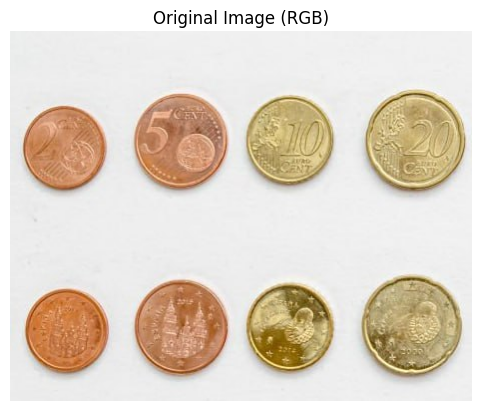

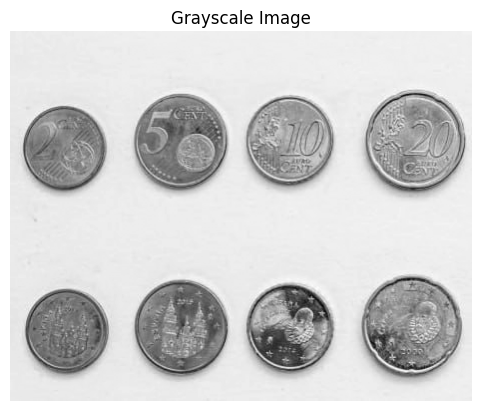

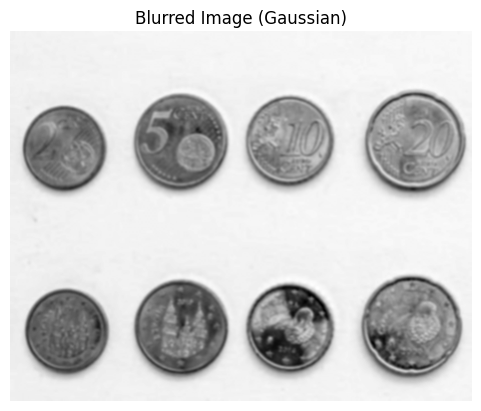

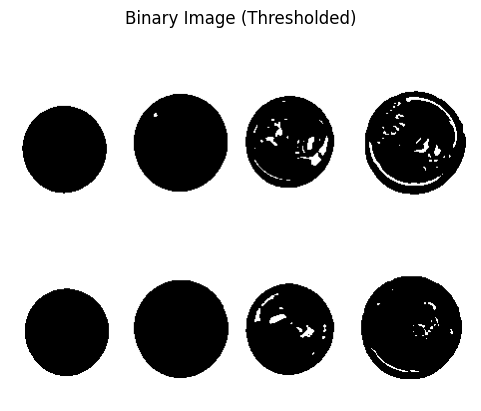

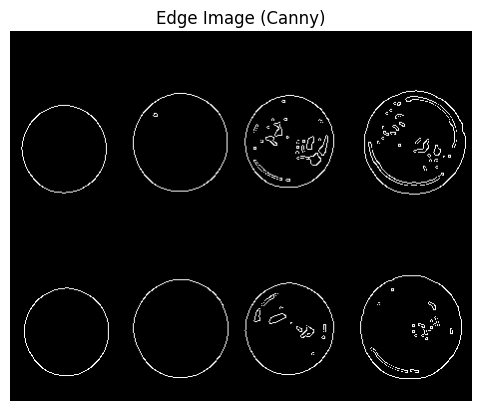

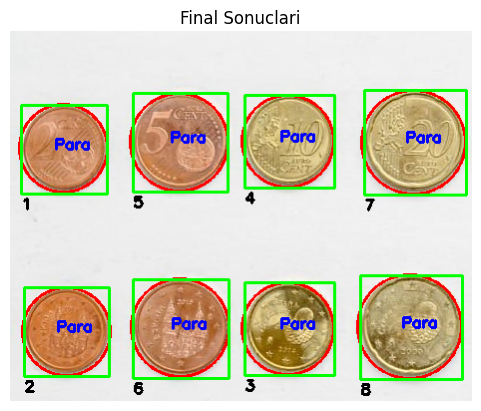

Bulunan Rakam Sayisi: 8


In [4]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# BGR formatinda oku
img = cv2.imread('para.jpg')
if img is None:
    raise FileNotFoundError("para.jpg bulunamadi")

# BGR'den RGB'ye
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Original Image (RGB)')
plt.axis('off')
plt.show()

#Resmi Grayscale'e cevir
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

# Gaussian Blur uygula
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
plt.imshow(blurred, cmap='gray')
plt.title('Blurred Image (Gaussian)')
plt.axis('off')
plt.show()

# Binary Image elde etmek icin threshold uygula
_, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(binary, cmap='gray')
plt.title('Binary Image (Thresholded)')
plt.axis('off')
plt.show()

# Canny uygulama
edges = cv2.Canny(binary, 50, 150)
plt.imshow(edges, cmap='gray')
plt.title('Edge Image (Canny)')
plt.axis('off')
plt.show()

#Contourlari bul ve uygula
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
result = img_rgb.copy()  # Work on a copy of the RGB image

if not contours:
    raise ValueError("Edge Image'ta countour tespi edilemedi.")

for contour in contours:
    #Kirmizi cevre ciz
    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    cv2.circle(result, center, radius, (255, 0, 0), 2)

    # yesil dikdortgen ciz
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(result, (x, y), (x + w, y + h), (0, 255, 0), 2)

    # Bounding Box'a istenilen rakamlari yaz
    center_x = x + w // 2
    center_y = y + h // 2
    cv2.putText(result, 'Para', (center_x - 10, center_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
#Bonus
# Contour alani hesaplama
areas = [cv2.contourArea(c) for c in contours]
# Kucukten buyuge sirala
sorted_contours = sorted(zip(areas, contours), key=lambda x: x[0])
# Kucukten buyuge numarala
for i, (area, contour) in enumerate(sorted_contours, start=1):
    x, y, w, h = cv2.boundingRect(contour)

    text_y = min(y + h + 15, img_rgb.shape[0] - 5)  # Dikdortgen disindakileri es gecme
    cv2.putText(result, str(i), (x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

# Sonuclar
plt.imshow(result)
plt.title('Final Sonuclari')
plt.axis('off')
plt.show()

print(f"Bulunan Rakam Sayisi: {len(contours)}")